In [1]:
import numpy as np
import math
import sympy

### Gradient Descent

In [39]:
eta = .1

x = np.array([1., 1.], np.float64)

def E(x):
    u, v = x
    return (u*math.exp(v) - 2*v*math.exp(-u)) ** 2

def dE(x):
    u0, v0 = x
    u, v = sympy.symbols('u, v')
    expr = (u*sympy.exp(v) - 2*v*sympy.exp(-u))** 2 
    du = sympy.diff(expr, u).subs({u:u0, v:v0}).n()
    dv = sympy.diff(expr, v).subs({u:u0, v:v0}).n()
    return np.array([du, dv], dtype=np.float64)

In [40]:
for i in range(11):
    print(i+1, ':', E(x))
    dx = dE(x)
    x -= eta*dx
    

1 : 3.93039723188
2 : 1.15950972997
3 : 1.00740748296
4 : 0.0990091216273
5 : 0.00866064536281
6 : 0.000181755791728
7 : 1.29723984784e-06
8 : 7.29152469846e-09
9 : 4.00999789056e-11
10 : 2.20168344841e-13
11 : 1.20868339442e-15


In [43]:
x = np.array([1., 1.], dtype=np.float64)

for i in range(15):
    # current Error
    print('iter-{}: {}'.format(i+1, E(x)))
    
    # step 1: update only u-coordinate
    du, _ = dE(x)
    x -= eta*np.array([du, 0], np.float64)
    
    # step 2: update only v-coordinate
    _, dv = dE(x)
    x -= eta*np.array([0, dv], np.float64)

iter-1: 3.9303972318771003
iter-2: 34.29016311234976
iter-3: 0.5341425913722001
iter-4: 0.4326608273241937
iter-5: 0.3650397350187306
iter-6: 0.31646807535966437
iter-7: 0.2797634230640926
iter-8: 0.25098631167528807
iter-9: 0.22778329894427699
iter-10: 0.20865669572438028
iter-11: 0.19260565861364648
iter-12: 0.17893474840754628
iter-13: 0.167145054343084
iter-14: 0.15686898732952279
iter-15: 0.14782952252409787


In [44]:
x

array([ 6.2970759 , -2.85230695])

### 2) Non-linear transformation

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
w = np.array([1, -.5, 0.5])


x1 = np.linspace(-10, 10, 200)
x2 = np.linspace(-10, 10, 200)
XX, YY = np.meshgrid(x1, x2)

Z = np.sign(np.dot(np.c_[np.ones(len(XX.ravel())), XX.ravel()**2, YY.ravel()**2], w).reshape(XX.shape))

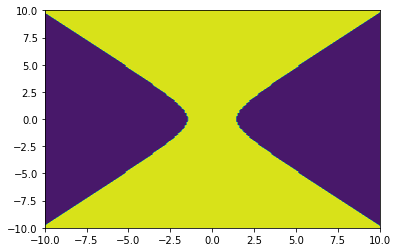

In [62]:
plt.contourf(XX, YY, Z)

In [63]:
Z[0, 0]

1.0

### Logistic Regression

In [72]:
def cost(X, y, w):
    n = X.shape[0]
    return np.log(1 + np.exp(-y*np.dot(X, w))).sum() / n


def grad(x, y, w):
    '''stochastic gradient descent'''
    return (-y/(1 + np.exp(y*np.dot(x, w)))) * x

def sigmoid(X, w):
    return 1./(1 + np.exp(-np.dot(X, w)))

In [133]:
N = 100
eta = .01




E_out = []
n_epoch = []
n_trial = 100
for _ in range(n_trial):
    
    # init experiment data and target function
    f = np.r_[0, np.random.uniform(-1, 1., 2)]

    # 100 training points, 100 test points
    X_train = np.c_[np.ones(N), np.random.uniform(low=-1, high=1, size=(N, 2))]
    y_train = np.where(sigmoid(X_train, f) > 0.5, 1, -1)
    X_test = np.c_[np.ones(100), np.random.uniform(-1, 1, (100, 2))]
    y_test = np.where(sigmoid(X_test, f) > 0.5, 1, -1)
    
    # init w0
    w = np.zeros_like(f)
    epoch = 0
    # perform 100 experiments
    while True:
        epoch += 1
        
        # shuffle training set
        idx = np.random.permutation(N)

        # stochastic gradient 1 epoch
        w_next = w.copy()
        for xi, yi in zip(X_train[idx], y_train[idx]):
            dE = grad(xi, yi, w_next)
            w_next -= eta*dE

        dw = w - w_next
        if np.sqrt(np.dot(dw, dw)) < .01:
            break
        w = w_next
        
    # record E_out
    E_out.append(cost(X_test, y_test, w))
    n_epoch.append(epoch)

In [134]:
np.mean(E_out), np.mean(n_epoch)

(0.10531657982187675, 343.68000000000001)

In [132]:
np.mean(E_out), np.mean(n_epoch)

(0.10253430838676883, 350.42000000000002)